#### Declare global variables
- use poisson process to model passing time and gate time

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from utils.doors import DoorType
from utils.line import Line
from utils.params import Params
plt.style.use('ggplot')
params = Params()
np.random.seed(42) # need to ensure # people generated is same for both line

#### Simulation of different type of doors

In [2]:
normalLine = Line(DoorType.normal)
openLine = Line(DoorType.keepOpen)

In [5]:
for i in range(50):
    normalLine.forward()

In [ ]:
normalPass, openPass = [], []
normal, open = 0, 0
for i in range(100):
    normalLine.forward()
    openLine.forward()
    normal, open = normalLine.PassingCounter, openLine.PassingCounter
    normalPass.append(normal)
    openPass.append(open)

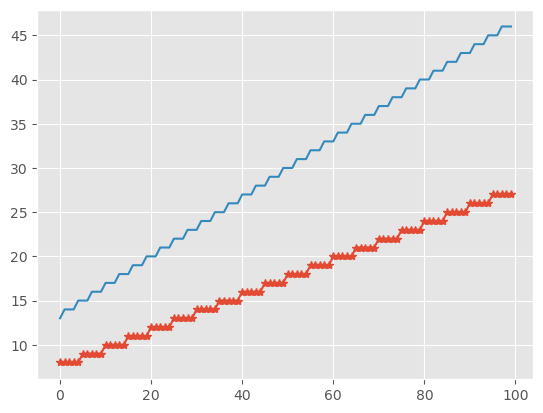

In [43]:
plt.plot(normalPass, '*-', label='normal')
plt.plot(openPass, label='open')

#### Statistic measurements for the performance of doors
- average queue length
- passing number in a given period of time

In [41]:
def average_queue_length():
    """
    Returns
    -------
    avg_normal: float
        average queue length for normal door
    avg_open: float
        average queue length for keep open door
    normal_num, open_num: list
        queue length for normal and open door
    """
    normalLine = Line(DoorType.normal)
    openLine = Line(DoorType.keepOpen)
    while 0 == normalLine.PassingCounter:
        # simulate still reaching stable condition
        normalLine.forward()
    while 0 == openLine.PassingCounter:
        openLine.forward()
    # average queue length
    sim_step = 1000 * params.timestep
    curr_step, counter = 0, 0
    normal_num, open_num = [], []
    while curr_step < sim_step:
        normalLine.forward()
        openLine.forward()
        curr_step += params.timestep
        if curr_step % int(4*params.timestep) == 0:
            normal_num.append(normalLine.count_occupied())
            open_num.append(openLine.count_occupied())
            counter += 1
    return sum(normal_num) / counter, sum(open_num) / counter, normal_num, open_num

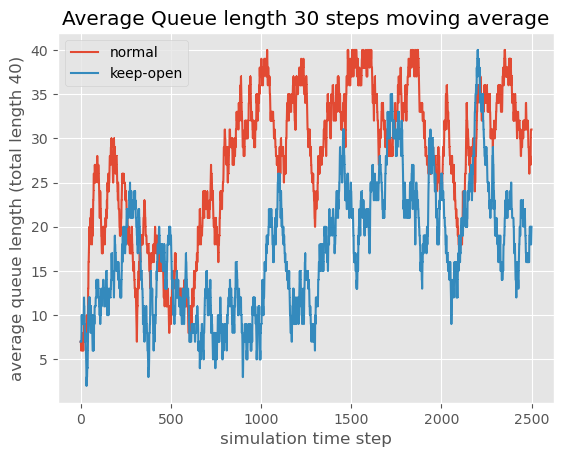

In [39]:
avg_normal, avg_open, normal_queue, open_queue = average_queue_length()
import pandas as pd
normal_que = pd.Series(normal_queue)
open_que = pd.Series(open_queue)
plt.plot(normal_que.rolling(window=1).mean(), ',-', label='normal')
plt.plot(open_que.rolling(window=1).mean(), ',-', label='keep-open')
plt.title('Average Queue length 30 steps moving average')
plt.xlabel('simulation time step')
plt.ylabel('average queue length (total length 40)')
plt.legend()

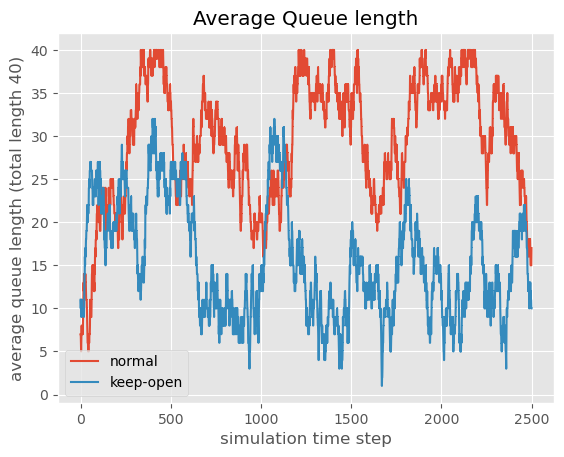

In [34]:
plt.plot(normal_queue, ',-', label='normal')
plt.plot(open_queue, ',-', label='keep-open')
plt.title('Average Queue length')
plt.xlabel('simulation time step')
plt.ylabel('average queue length (total length 40)')
plt.legend()
plt.savefig('../data/queue_length_time.png', dpi=200)

In [42]:
# ratio of avg_normal and avg_open - hope it converges
sim_times = 100
times = 0
ratio = []
while times < sim_times:
    avg_normal, avg_open, _, _ = average_queue_length()
    ratio.append(avg_open / avg_normal)
    times += 1
# plt.plot(ratio, '.-', label='ratio of normal to open')
# plt.legend()

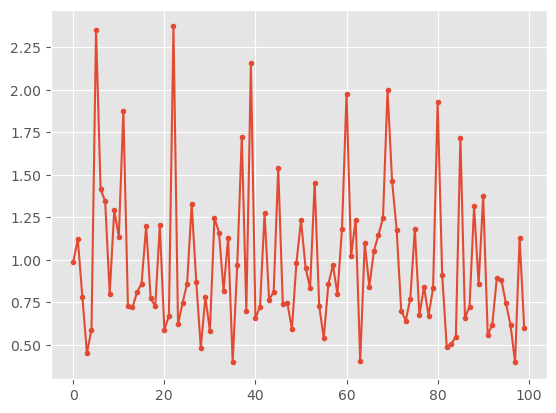

In [43]:
plt.plot(ratio, marker='.')

In [45]:
from scipy import stats
mean = np.mean(ratio)
s2 = np.std(ratio, ddof=1) ** 2

# Calculate the 95% confidence interval
confidence_level = 0.90
z_score = stats.t.ppf(1-(1 - confidence_level)/2, len(ratio)-1)
ci_lower = mean - z_score * s2 / np.sqrt(len(ratio))
ci_upper = mean + z_score * s2 / np.sqrt(len(ratio))

In [46]:
print(f"[{ci_lower, ci_upper}]")

[(0.9525780480056735, 1.012907463116374)]


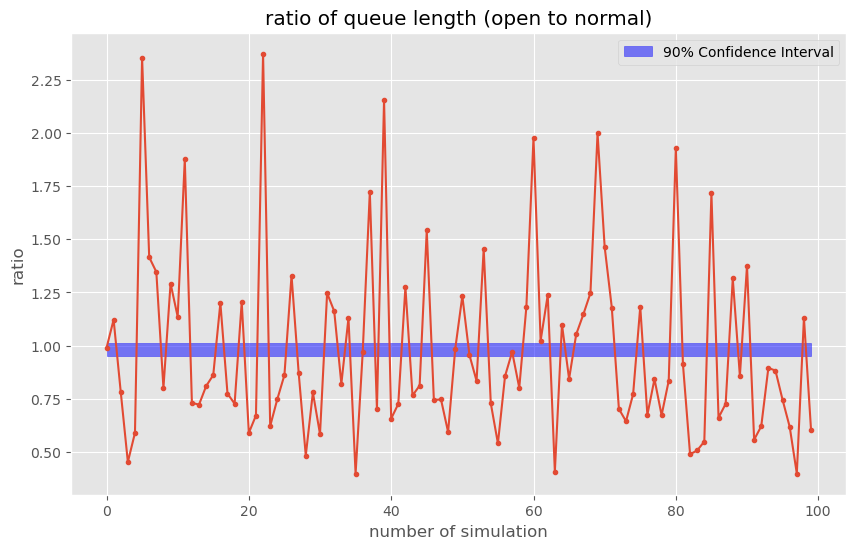

In [48]:
plt.figure(figsize=(10,6))
plt.plot(ratio, marker='.')
plt.title('ratio of queue length (open to normal)')
plt.xlabel('number of simulation')
plt.ylabel('ratio')
# Fill the confidence interval
plt.fill_between(range(len(ratio)), ci_lower, ci_upper, color='blue', alpha=.5, label='90% Confidence Interval')
plt.legend()
plt.savefig('../data/ratio_low_success_rate.png', dpi=200)

In [66]:
mean_time = np.mean(ratio)
var_time = np.std(ratio)
ci = [mean_time - 2 * var_time, mean_time + 2 * var_time]

[0.3917797162988333, 0.5124781595108039]

In [29]:
print(f"average length for normal: {avg_normal}, average length for open: {avg_open}")

average length for normal: 19.9104, average length for open: 8.6348


Arrival times: [0.50062794 0.50993998 0.58426086 0.63065517 0.6309004  0.81335054
 0.89109978 0.89384698 0.91242322 1.30089457 1.49304805 1.91885143
 2.12500127 2.18144705 2.22941813 2.30853203 2.62377174 3.40722165
 3.57190907 3.67117279 3.80599849 3.85268516 4.553798   4.58430607
 4.78420012 4.98209966 5.37036037 5.68041602 5.74456773 6.0955516
 6.41127232 6.48862555 6.64526067 6.67266123 6.89186971 7.06101873
 7.11573876 7.38352473 7.5966532  7.81609045 8.25181048 8.83672342
 8.85046525 9.15144139 9.19818074 9.53362977 9.70580342 9.84636368]


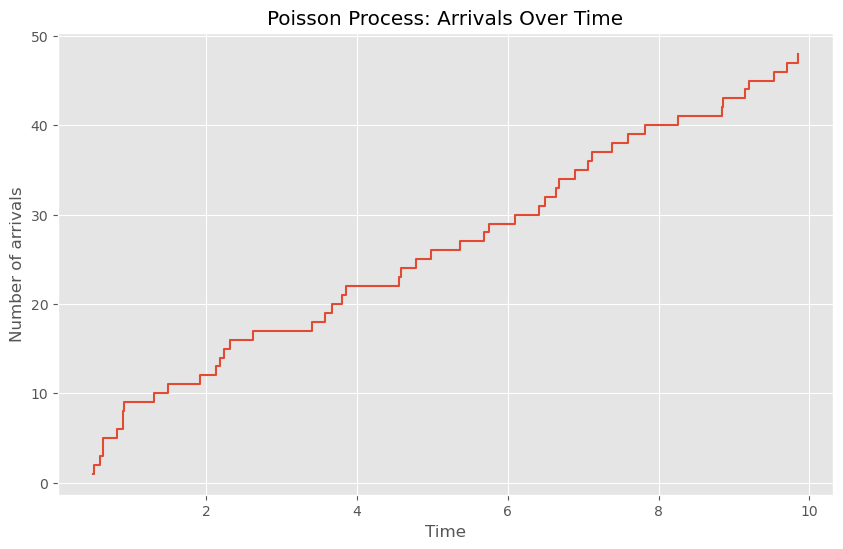

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 5  # average rate (people per unit time)
time_period = 10  # total time period for the simulation

# Generate inter-arrival times
inter_arrival_times = np.random.exponential(1/lambda_rate, int(lambda_rate * time_period * 1.5))

# Generate arrival times by taking the cumulative sum of inter-arrival times
arrival_times = np.cumsum(inter_arrival_times)

# Filter arrival times to be within the time period
arrival_times = arrival_times[arrival_times <= time_period]

# Display the results
print("Arrival times:", arrival_times)

# Plot the arrivals over time
plt.figure(figsize=(10, 6))
plt.step(arrival_times, np.arange(1, len(arrival_times) + 1), where='post')
plt.xlabel('Time')
plt.ylabel('Number of arrivals')
plt.title('Poisson Process: Arrivals Over Time')
plt.grid(True)
plt.show()

In [13]:
test = 4.4
np.round(test)

4.0